In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors
import numpy as np
from scipy.stats import wilcoxon



In [2]:
matplotlib.rc('font', family='Arial') 

In [4]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

In [5]:
excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS",   # Timor-Leste
    "GEO" #Georgia

]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]

In [6]:
possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [7]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[df['country'].isin(possible_iso)]
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
df = df[df['year'].isin(range(2002, 2020))]

In [8]:
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2002 and x<=2010 else 'after' )


In [9]:
df=df[df['Mention_country'].isin(abbr)].groupby(['Mention_country','year_arabspring', 'Aff_country' ])['count'].sum().reset_index()

In [10]:
df_pivoted = df.pivot(index=['Mention_country', 'Aff_country'], columns='year_arabspring', values='count').reset_index().fillna(0)



In [11]:
df_pivoted=df_pivoted[df_pivoted['Mention_country']!=df_pivoted['Aff_country']]

In [12]:
df_pivoted['Change']=df_pivoted['after']-df_pivoted['before']
df_pivoted['Change']/=9
to_study=df_pivoted.groupby('Aff_country')['Change'].sum().sort_values(ascending=False)[:10].index.tolist()
to_study

['usa', 'gbr', 'sau', 'fra', 'esp', 'deu', 'ita', 'mys', 'irn', 'aus']

In [13]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df[df['country'].isin(possible_iso)]
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
df = df[df['year'].isin(range(2002, 2020))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df['year_arabspring']=df['year'].apply(lambda x: 'before' if x>=2002 and x<=2010 else 'after' )



In [14]:
    country_colors_manual = {
        'EGY': 'C0',  # Egypt
        'TUN': 'C1',  # Tunisia
        'LBY': 'C2',  # Libya 
        'SYR': 'C3',  # Syria
        'YEM': 'C4',  # Yemen
        'BHR': 'C5',  # Bahrain
        'JOR': 'C6',  # Jordan
        'KWT': 'C7',  # Kuwait
        'MAR': 'C8',  # Morocco
        'OMN': 'C9',  # Oman
    }

In [19]:
    # Define full country names
    country_full_names = {
        'EGY': 'Egypt',
        'LBY': 'Libya',
        'TUN': 'Tunisia',
        'SYR': 'Syria',
        'YEM': 'Yemen',
        'MAR': 'Morocco',
        'OMN': 'Oman',
        'BHR': 'Bahrain',
        'KWT': 'Kuwait',
        'JOR': 'Jordan',
    }

to_study_map={'usa':'USA', 'gbr':'UK', 'sau':'Saudi Arabia', 'fra':'France', 'esp':'Spain', 'deu':'Germany', 'ita':'Italy', 'mys':'Malaysia', 'irn':'Iran', 'aus':'Australia'}

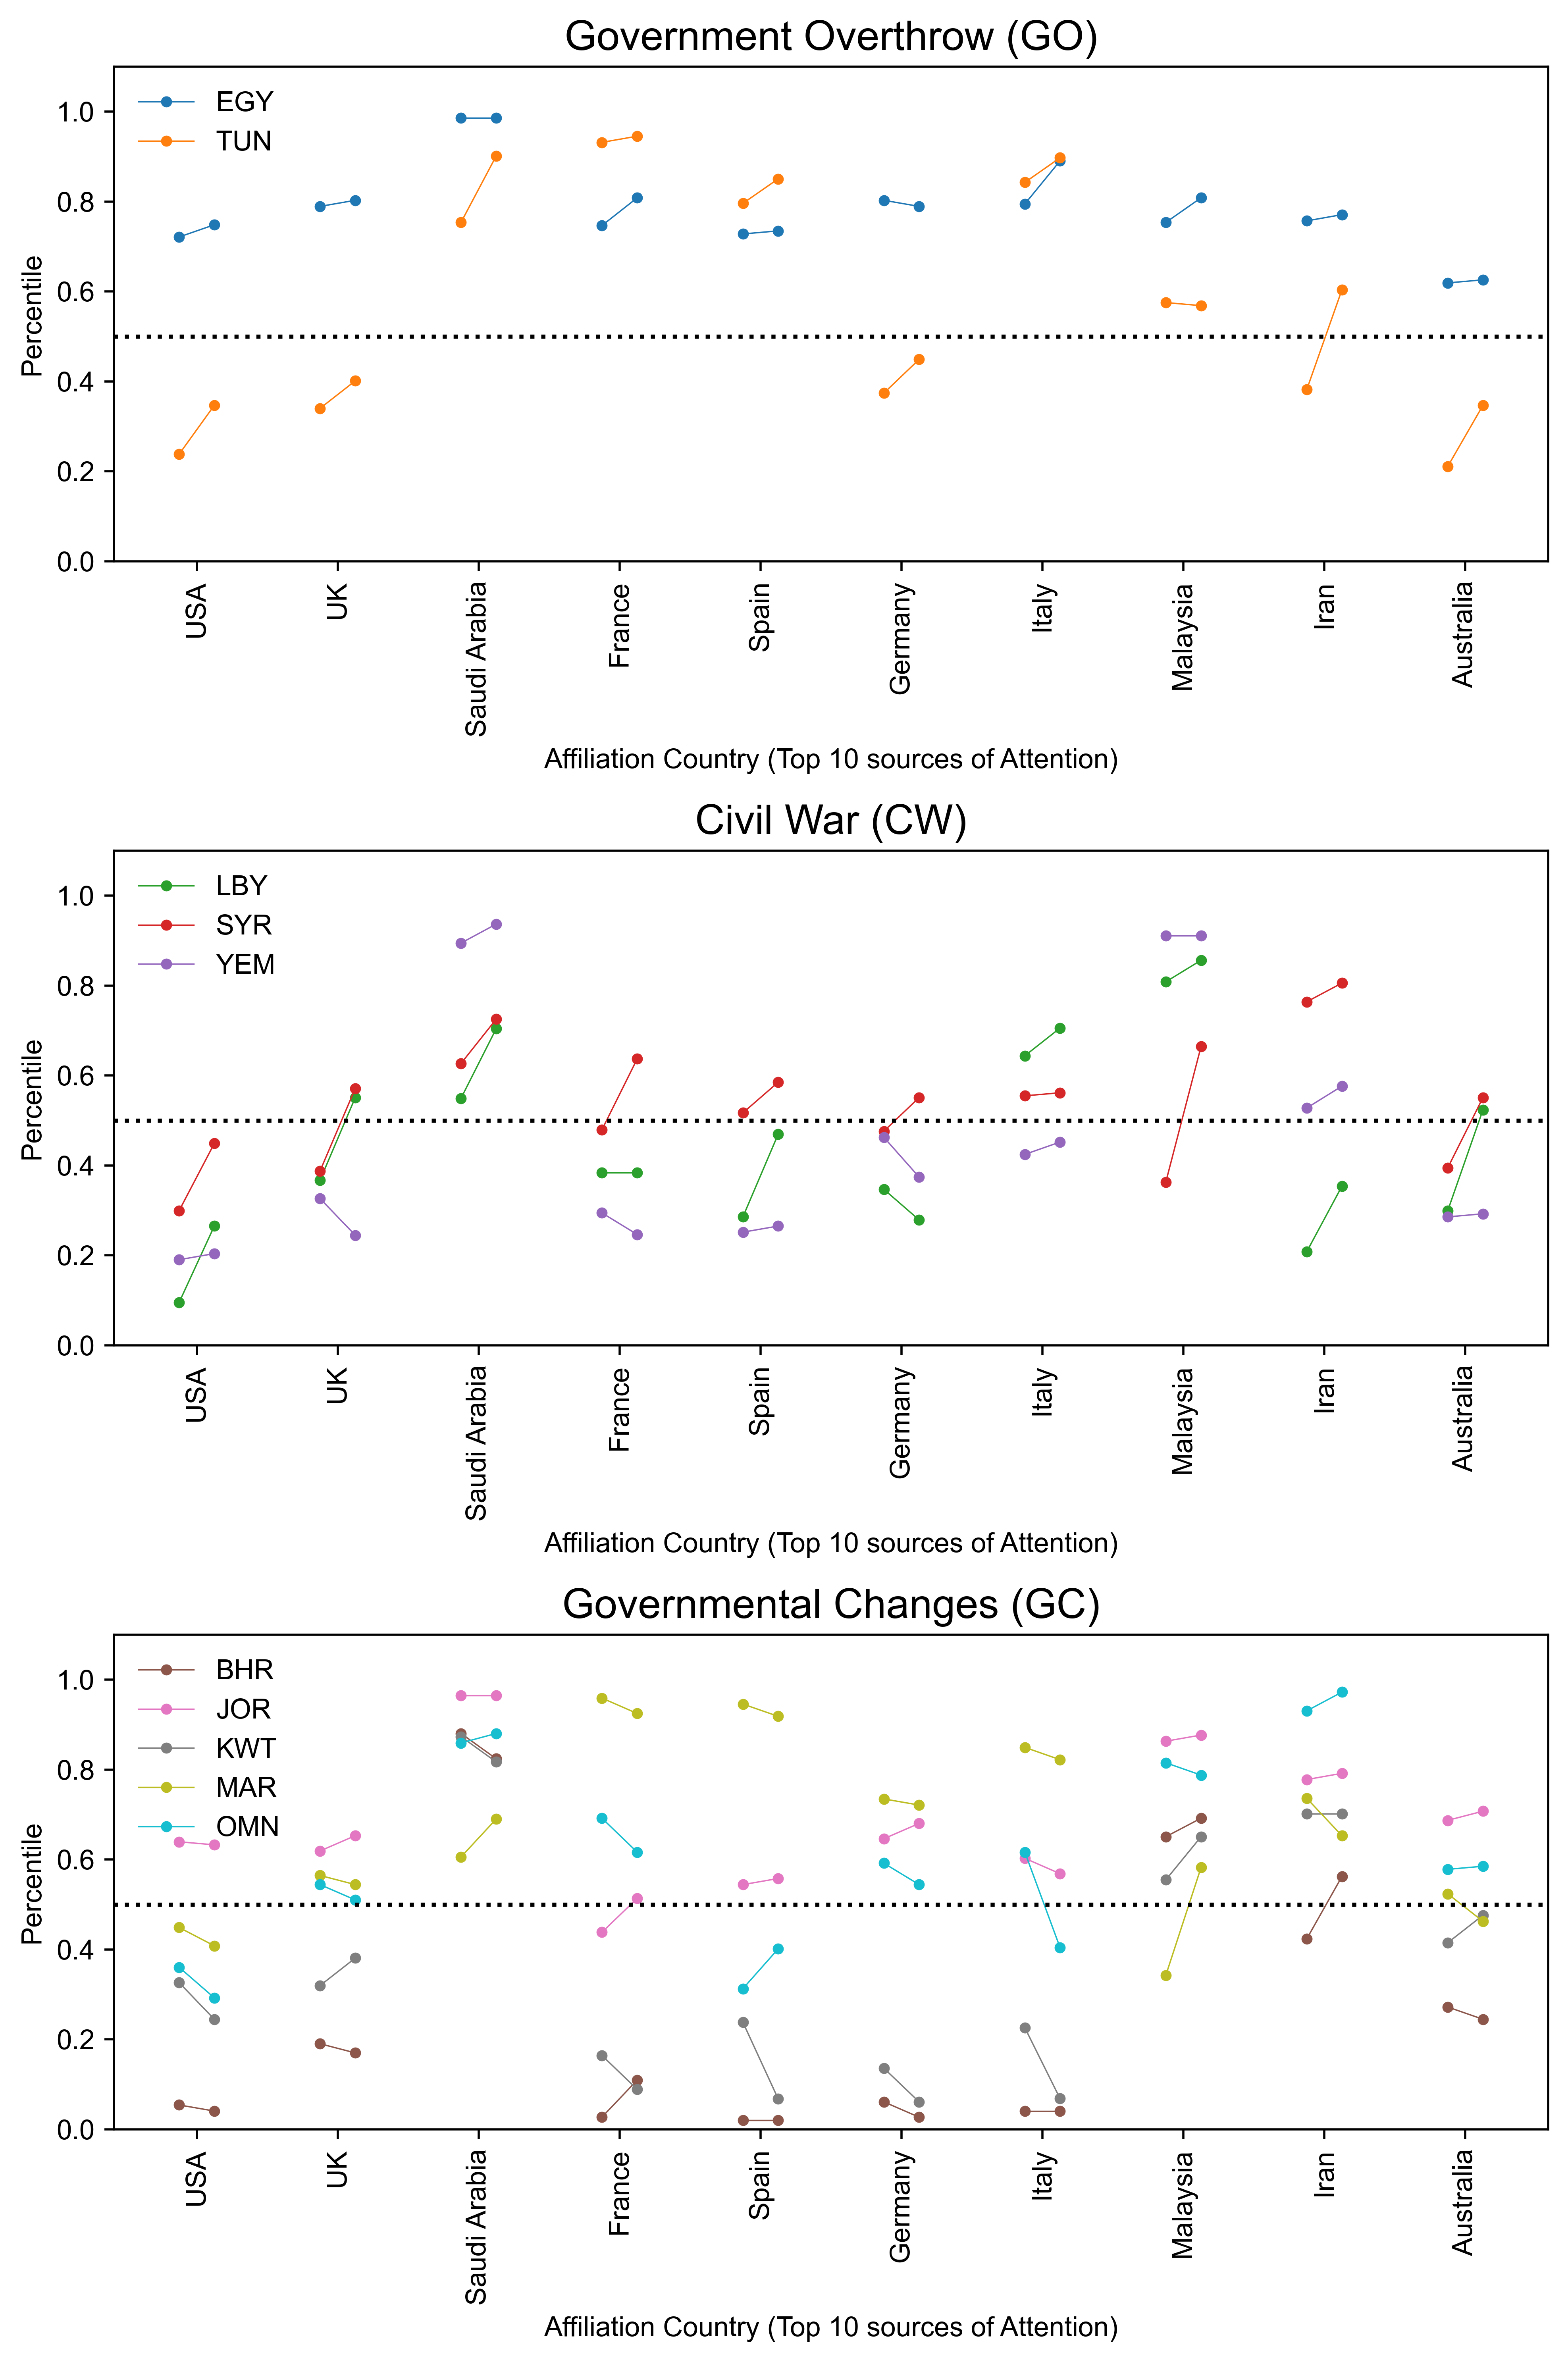

In [35]:
fig, ax=plt.subplots(nrows=3, ncols=1, dpi=500, figsize=(8, 12))
for j, country in enumerate(to_study):
    country_df=df[df['Aff_country']==country].groupby(['Mention_country', 'year_arabspring'])['count'].sum().reset_index()#.drop(columns=['year', 'Aff_country','subjarea'])
    df_pivoted = country_df.pivot(index=['Mention_country'], columns='year_arabspring', values='count').reset_index().fillna(0)
    df_pivoted['before_rank']=df_pivoted['before'].rank(pct=True)
    df_pivoted['after_rank']=df_pivoted['after'].rank(pct=True)
    final_df=df_pivoted[df_pivoted['Mention_country'].isin(abbr)].reset_index(drop=True)
    for i, row in final_df.iterrows():
        if row['Mention_country'] in (['tun', 'egy',]):
            axis=ax[0]
        elif row['Mention_country'] in (['syr','lby', 'yem']):
            axis=ax[1]
        else:
            axis=ax[2]

        if j==0:
            axis.plot([2*j+0, 2*j+0.5], [row['before_rank'], row['after_rank']], marker='.', color=country_colors_manual[row['Mention_country'].upper()], label=row['Mention_country'].upper(), linewidth=0.5)
        else:
            axis.plot([2*j+0, 2*j+0.5], [row['before_rank'], row['after_rank']], marker='.', color=country_colors_manual[row['Mention_country'].upper()], linewidth=0.5)

for i in range(3):
    ax[i].set_ylim(0, 1.1)
    
    ax[i].set_xticks(np.arange(0, 2*len(to_study),2)+0.25, to_study_map.values(), rotation=90)
    
    ax[i].set_xlabel('Affiliation Country (Top 10 sources of Attention)')
    ax[i].set_ylabel('Percentile')
    ax[i].axhline(0.5, linestyle=':', color='k')
    ax[i].legend(frameon=False, loc='upper left')

ax[0].set_title('Government Overthrow (GO)', fontsize=15)
ax[1].set_title('Civil War (CW)', fontsize=15)
ax[2].set_title('Governmental Changes (GC)', fontsize=15)

#fig.legend(frameon=False, bbox_to_anchor=(0.90, 1),
 #           ncol=10)

fig.tight_layout()
fig.savefig('rankchanges.pdf')

In [31]:
for j, country in enumerate(to_study):
    country_df=df[df['Aff_country']==country].groupby(['Mention_country', 'year_arabspring'])['count'].sum().reset_index()#.drop(columns=['year', 'Aff_country','subjarea'])
    df_pivoted = country_df.pivot(index=['Mention_country'], columns='year_arabspring', values='count').reset_index().fillna(0)
    df_pivoted['before_rank']=df_pivoted['before'].rank(pct=True)
    df_pivoted['after_rank']=df_pivoted['after'].rank(pct=True)
    final_df=df_pivoted[df_pivoted['Mention_country'].isin(abbr)].reset_index(drop=True)

    # Example data: ranks of 10 countries before and after an event
    # (Make sure that lower rank numbers indicate higher performance if that's how you're interpreting them)
    final_df.sort_values('Mention_country', inplace=True)
    final_df=final_df[final_df['Mention_country'].isin(['tun', 'egy','syr','lby', 'yem'])]
    before =final_df['before_rank']
    after  =final_df['after_rank']

    # Perform the Wilcoxon Signed-Rank Test
    statistic, p_value = wilcoxon(before, after)
    print(country,"Wilcoxon test statistic:", statistic,"p-value:", p_value, )
    print()

usa Wilcoxon test statistic: 0.0 p-value: 0.0625

gbr Wilcoxon test statistic: 3.0 p-value: 0.3125

sau Wilcoxon test statistic: 0.0 p-value: 0.06788915486182899

fra Wilcoxon test statistic: 2.0 p-value: 0.27332167829229814

esp Wilcoxon test statistic: 0.0 p-value: 0.0625

deu Wilcoxon test statistic: 7.0 p-value: 1.0



c:\Users\Yasaman\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
c:\Users\Yasaman\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
c:\Users\Yasaman\anaconda3\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


ita Wilcoxon test statistic: 0.0 p-value: 0.0625

mys Wilcoxon test statistic: 1.0 p-value: 0.14412703481601533

irn Wilcoxon test statistic: 0.0 p-value: 0.0625

aus Wilcoxon test statistic: 0.0 p-value: 0.0625



Wilcoxon test statistic: 12.0
p-value: 0.130859375
